In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import statsmodels.api as sm

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/statewise_not_vot.csv')

In [ ]:
df

,t_date,t_state_code,t_site_code,not,vot
0,01-01-2022,ANI,ANI,1,9.825360e+05
1,01-01-2022,ASM,ASM,9,1.227259e+08
2,01-01-2022,BHEL,BHEL,8,8.000000e+05
3,01-01-2022,CIL,CIL,28,2.461433e+07
4,01-01-2022,DEFPSU,DEFPSU,4,8.561770e+06
...,...,...,...,...,...
5831,29-06-2022,TRP,TRP,53,3.693301e+08
5832,29-06-2022,UK,UK,26,1.532709e+08
5833,29-06-2022,UP,UP,518,3.591432e+09
5834,29-06-2022,UTL,UTL,1,0.000000e+00


In [ ]:
fig = px.line(df,x="t_date",y="not",title="NUMBER OF TENDERS")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))

In [ ]:
fig = px.line(df,x="t_date",y="not",title="NUMBER OF TENDERS")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))

In [ ]:
fig=px.bar(df,x='t_state_code',y='t_date')
fig.show()

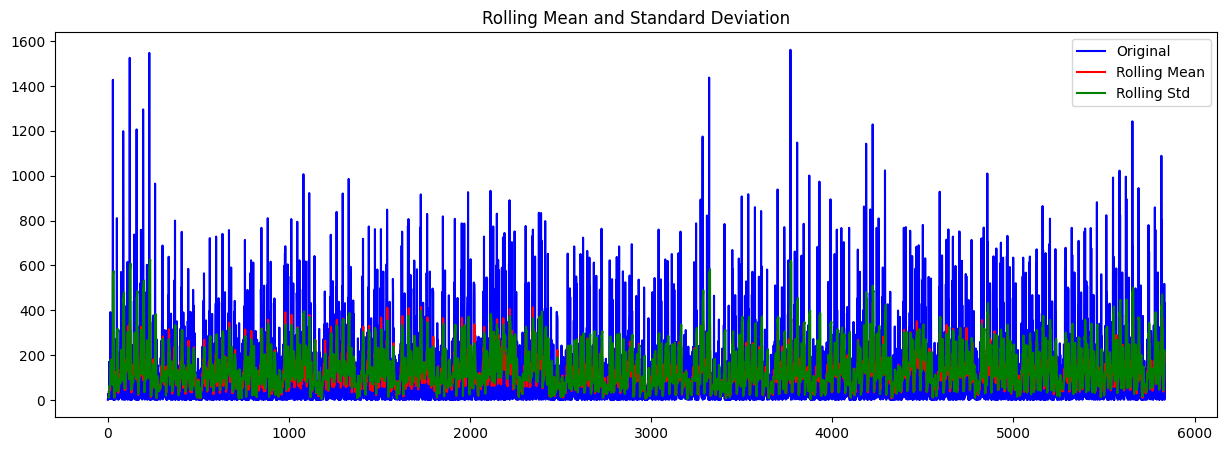

Results of dickey fuller test
Test Statistics               -9.300741e+00
p-value                        1.114284e-15
No. of lags used               3.400000e+01
Number of observations used    5.801000e+03
dtype: float64


In [ ]:
def test_stationarity(timeseries):


    rolmean = timeseries.rolling(6).mean()
    rolstd = timeseries.rolling(6).std()


    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(df['not'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(NOT):
    result=adfuller(NOT)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['not'])

ADF Test Statistic : -9.300740722526585
p-value : 1.1142837123962776e-15
#Lags Used : 34
Number of Observations Used : 5801
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df['First Difference for NOT']=df['not']-df['not'].shift(1)

In [ ]:
adfuller_test(df['First Difference for NOT'].dropna())

ADF Test Statistic : -33.47927112497965
p-value : 0.0
#Lags Used : 34
Number of Observations Used : 5800
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



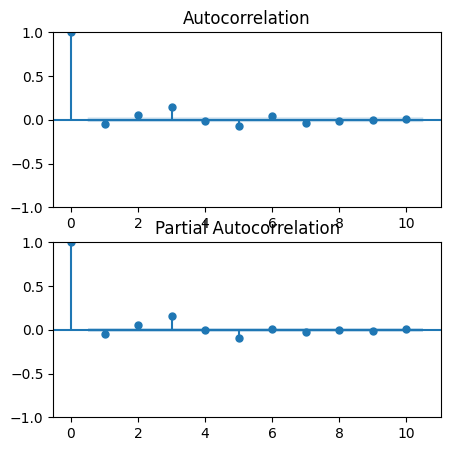

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['not'],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['not'],lags=10,ax=ax2)

# **ARIMA**

In [ ]:
df_new=pd.DataFrame()

In [ ]:
df_new['Date']=pd.to_datetime(df['t_date'])

<ipython-input-167-e02a56a5ecfb>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
df

,t_date,t_state_code,t_site_code,not,vot,First Difference for NOT
0,01-01-2022,ANI,ANI,1,9.825360e+05,NaN
1,01-01-2022,ASM,ASM,9,1.227259e+08,8.0
2,01-01-2022,BHEL,BHEL,8,8.000000e+05,-1.0
3,01-01-2022,CIL,CIL,28,2.461433e+07,20.0
4,01-01-2022,DEFPSU,DEFPSU,4,8.561770e+06,-24.0
...,...,...,...,...,...,...
5831,29-06-2022,TRP,TRP,53,3.693301e+08,-178.0
5832,29-06-2022,UK,UK,26,1.532709e+08,-27.0
5833,29-06-2022,UP,UP,518,3.591432e+09,492.0
5834,29-06-2022,UTL,UTL,1,0.000000e+00,-517.0


In [ ]:
df_new['Target_Tender_Sold']=df['not']

In [ ]:
# df_new.set_index('Date', inplace=True)

# df_new.sort_index(inplace=True)

In [ ]:
df_new

,Date,Target_Tender_Sold
0,2022-01-01,1
1,2022-01-01,9
2,2022-01-01,8
3,2022-01-01,28
4,2022-01-01,4
...,...,...
5831,2022-06-29,53
5832,2022-06-29,26
5833,2022-06-29,518
5834,2022-06-29,1


In [ ]:
df_new[df_new['Target_Tender_Sold']==0]

,Date,Target_Tender_Sold


In [ ]:
df_new[df_new['Date']==df_new['Date'][1]]['Target_Tender_Sold'].sum()

3657

In [ ]:
data=df_new.groupby('Date').sum()

In [ ]:
data[data['Target_Tender_Sold']==0]

,Target_Tender_Sold
Date,


In [ ]:
data.dropna()

,Target_Tender_Sold
Date,
2022-01-01,3657
2022-01-02,5163
2022-01-03,2489
2022-01-04,4145
2022-01-05,1012
...,...
2022-12-02,2197
2022-12-03,3446
2022-12-04,5988


In [ ]:
Target = data['Target_Tender_Sold']

In [ ]:
train_size = int(len(Target) * 0.8)
train_size

144

In [ ]:

train, test = Target[:train_size], Target[train_size:]

In [ ]:
train

Date
2022-01-01    3657
2022-01-02    5163
2022-01-03    2489
2022-01-04    4145
2022-01-05    1012
              ... 
2022-06-25    3812
2022-06-26    1178
2022-06-27    4342
2022-06-28    5568
2022-06-29    5408
Name: Target_Tender_Sold, Length: 144, dtype: int64

In [ ]:
test

Date
2022-07-01    6255
2022-07-02    3795
2022-07-03    5189
2022-07-04    4611
2022-07-05    3491
2022-07-06    4684
2022-08-01    3163
2022-08-02    4488
2022-08-03    6037
2022-08-04    4867
2022-08-05    1053
2022-08-06    4791
2022-09-01    1158
2022-09-02    4960
2022-09-03    6235
2022-09-04    2199
2022-09-05    4405
2022-09-06    5404
2022-10-01    4145
2022-10-02    4980
2022-10-03    6260
2022-10-04     994
2022-10-05    6256
2022-10-06    5106
2022-11-01    4601
2022-11-02    5193
2022-11-03    6401
2022-11-04    4549
2022-11-05    6235
2022-11-06    2614
2022-12-01    4583
2022-12-02    2197
2022-12-03    3446
2022-12-04    5988
2022-12-05    5398
2022-12-06    1099
Name: Target_Tender_Sold, dtype: int64

In [ ]:
len(test)

36

In [ ]:
import numpy as np

In [ ]:

order = (5,1,4)
model = ARIMA(train, order=order)
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
forecast = np.array(forecast)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index 

In [ ]:
len(test)

36

In [ ]:

len(forecast)

36

In [ ]:
test

Date
2022-07-01    6255
2022-07-02    3795
2022-07-03    5189
2022-07-04    4611
2022-07-05    3491
2022-07-06    4684
2022-08-01    3163
2022-08-02    4488
2022-08-03    6037
2022-08-04    4867
2022-08-05    1053
2022-08-06    4791
2022-09-01    1158
2022-09-02    4960
2022-09-03    6235
2022-09-04    2199
2022-09-05    4405
2022-09-06    5404
2022-10-01    4145
2022-10-02    4980
2022-10-03    6260
2022-10-04     994
2022-10-05    6256
2022-10-06    5106
2022-11-01    4601
2022-11-02    5193
2022-11-03    6401
2022-11-04    4549
2022-11-05    6235
2022-11-06    2614
2022-12-01    4583
2022-12-02    2197
2022-12-03    3446
2022-12-04    5988
2022-12-05    5398
2022-12-06    1099
Name: Target_Tender_Sold, dtype: int64

In [ ]:
forecast

array([4610.46932068, 3753.1333328 , 3417.03093407, 4310.53458228,
       4376.49711009, 3999.17975392, 4673.26394953, 4786.24083495,
       4148.12466554, 4561.49242999, 4851.88255828, 4184.47718848,
       4393.58835169, 4874.99354269, 4282.68410989, 4267.15422458,
       4867.15959935, 4414.14817855, 4175.64456197, 4812.56577669,
       4550.62388688, 4124.55507702, 4717.96674976, 4675.45605078,
       4120.38199228, 4597.2576903 , 4773.96876665, 4162.77802473,
       4466.33953383, 4834.47753843, 4245.17682124, 4341.8217494 ,
       4850.33553286, 4356.20469312, 4239.13515745, 4820.70173045])

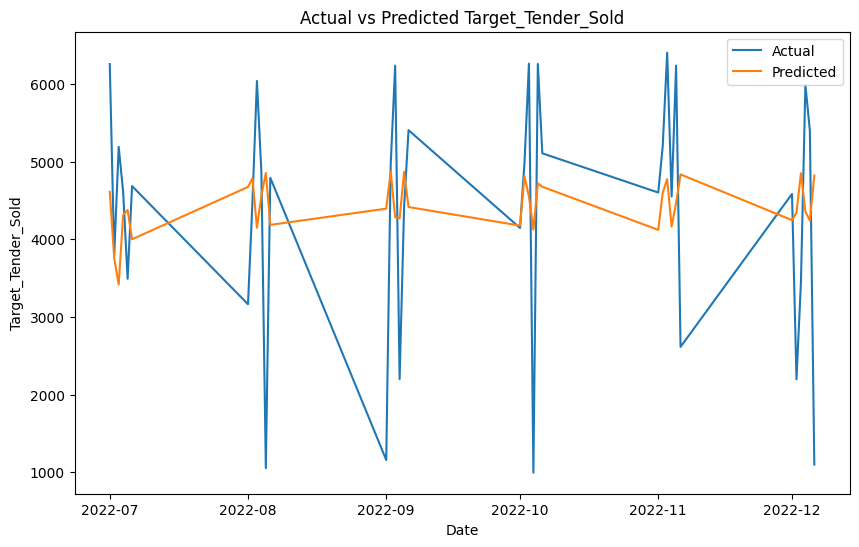

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual values
ax.plot(data.index[train_size:], test, label='Actual')

# Plot the predicted values
ax.plot(data.index[train_size:], forecast, label='Predicted')

# Set plot title and labels
ax.set_title('Actual vs Predicted Target_Tender_Sold')
ax.set_xlabel('Date')
ax.set_ylabel('Target_Tender_Sold')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions with the trained ARIMA model
y_pred_arima = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics for ARIMA model
mse_arima = mean_squared_error(test, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test, y_pred_arima)
r2_arima = r2_score( y_pred_arima,test)

# Print evaluation metrics for ARIMA model
print("ARIMA(not) Model Evaluation Metrics:")
print("MSE: ", mse_arima)
print("RMSE: ", rmse_arima)
print("MAE: ", mae_arima)

ARIMA(not) Model Evaluation Metrics:
MSE:  2751802.1229453785
RMSE:  1658.855666700807
MAE:  1305.9777676668668


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



# **SARIMA**

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



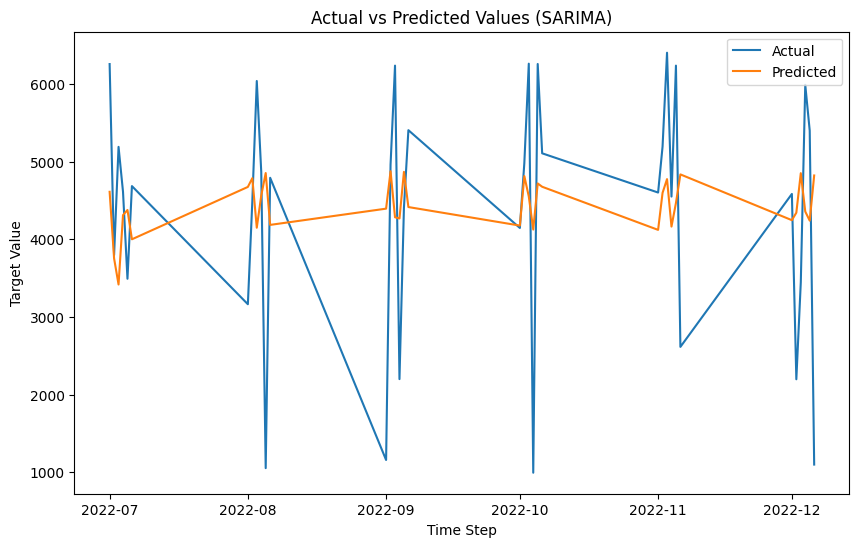

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the SARIMA model parameters
order = (5, 1, 4)  # (p, d, q)
seasonal_order = (0, 0, 0, 0)  # (P, D, Q, S)

# Train the SARIMA model
model = sm.tsa.SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make predictions with the trained SARIMA model
y_pred = model_fit.forecast(steps=len(test))

# Plot the actual values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Target Value')
plt.legend()
plt.title('Actual vs Predicted Values (SARIMA)')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions with the trained SARIMA model
y_pred_sarima = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics for SARIMA model
mse_sarima = mean_squared_error(test, y_pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)
mae_sarima = mean_absolute_error(test, y_pred_sarima)
r2_sarima = r2_score( y_pred_sarima,test)

# Print evaluation metrics for SARIMA model
print("SARIMA Model Evaluation Metrics:")
print("MSE: ", mse_sarima)
print("RMSE: ", rmse_sarima)
print("MAE: ", mae_sarima)

SARIMA Model Evaluation Metrics:
MSE:  2751802.1229453785
RMSE:  1658.855666700807
MAE:  1305.9777676668668


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



# **LSTM**


In [ ]:
data

,Target_Tender_Sold
Date,
2022-01-01,3657
2022-01-02,5163
2022-01-03,2489
2022-01-04,4145
2022-01-05,1012
...,...
2022-12-02,2197
2022-12-03,3446
2022-12-04,5988


In [ ]:
data=data['Target_Tender_Sold']

In [ ]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% for training
train, test = data[:train_size], data[train_size:]


In [ ]:
# Define the number of time steps and features
n_time_steps = 7  # Number of time steps (days) to use for input sequence
n_features = 1  # Number of features (target variable)




In [ ]:
train

Date
2022-01-01    3657
2022-01-02    5163
2022-01-03    2489
2022-01-04    4145
2022-01-05    1012
              ... 
2022-06-25    3812
2022-06-26    1178
2022-06-27    4342
2022-06-28    5568
2022-06-29    5408
Name: Target_Tender_Sold, Length: 144, dtype: int64

In [ ]:
X_train, y_train = [], []
for i in range(len(train) - n_time_steps):
    X_train.append(train[i:i + n_time_steps])
    y_train.append(train[i + n_time_steps])

In [ ]:
X_train[1]

Date
2022-01-02    5163
2022-01-03    2489
2022-01-04    4145
2022-01-05    1012
2022-01-06    4967
2022-01-13    4606
2022-01-14    3677
Name: Target_Tender_Sold, dtype: int64

In [ ]:
y_train[1]

2681

In [ ]:
data.head(12)

Date
2022-01-01    3657
2022-01-02    5163
2022-01-03    2489
2022-01-04    4145
2022-01-05    1012
2022-01-06    4967
2022-01-13    4606
2022-01-14    3677
2022-01-15    2681
2022-01-16     847
2022-01-17    3785
2022-01-18    4066
Name: Target_Tender_Sold, dtype: int64

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(n_time_steps, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 13ms/step - loss: 15341913.0000
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 14510773.0000
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 13165374.0000
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 12401785.0000
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 11443355.0000
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 10092610.0000
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 8934807.0000
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 7464743.0000
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 5810822.0000
Epoch 10/100
5/5 [==============================] - 0s 12ms/step - loss: 4904741.5000
Epoch 11/100
5/5 [==============================] - 0s 12ms/step - loss: 4368053.5000
Epoch 12/100
5/5 [==============================] - 0s 14

In [ ]:
X_train

array([[3657, 5163, 2489, 4145, 1012, 4967, 4606],
       [5163, 2489, 4145, 1012, 4967, 4606, 3677],
       [2489, 4145, 1012, 4967, 4606, 3677, 2681],
       [4145, 1012, 4967, 4606, 3677, 2681,  847],
       [1012, 4967, 4606, 3677, 2681,  847, 3785],
       [4967, 4606, 3677, 2681,  847, 3785, 4066],
       [4606, 3677, 2681,  847, 3785, 4066, 4334],
       [3677, 2681,  847, 3785, 4066, 4334, 4486],
       [2681,  847, 3785, 4066, 4334, 4486, 4890],
       [ 847, 3785, 4066, 4334, 4486, 4890, 2962],
       [3785, 4066, 4334, 4486, 4890, 2962, 1014],
       [4066, 4334, 4486, 4890, 2962, 1014, 4209],
       [4334, 4486, 4890, 2962, 1014, 4209, 4448],
       [4486, 4890, 2962, 1014, 4209, 4448, 1756],
       [4890, 2962, 1014, 4209, 4448, 1756, 4424],
       [2962, 1014, 4209, 4448, 1756, 4424, 4980],
       [1014, 4209, 4448, 1756, 4424, 4980, 3049],
       [4209, 4448, 1756, 4424, 4980, 3049, 1114],
       [4448, 1756, 4424, 4980, 3049, 1114, 5089],
       [1756, 4424, 4980, 3049,

In [ ]:
y_train

array([3677, 2681,  847, 3785, 4066, 4334, 4486, 4890, 2962, 1014, 4209,
       4448, 1756, 4424, 4980, 3049, 1114, 5089, 2154, 5035, 4767, 2121,
       4472, 4926,  957, 3692, 4408, 4089, 4821, 5060, 3116,  838, 4554,
       4927, 4598, 5241, 5473, 3318, 1245, 4922, 4969, 5189, 5748,  768,
       1092, 5097, 1188, 5371, 6421, 6644, 5444, 1902, 2727, 1142, 4242,
       4466, 4972, 4852, 4644, 3462, 1165, 3860, 4399, 3526, 5218, 6343,
       4809, 5721, 3427, 4205, 3468, 6361, 1593, 1631, 2609, 1032, 4662,
       5373, 5003, 4904, 4845, 2850,  885, 4615, 4824, 5502, 5451, 5100,
       3779, 5790, 3068, 4357, 4365, 4851,  960, 5933, 2935, 1021, 2580,
       5054, 5315, 6303, 6118, 3730, 1192, 5117, 5595, 5376, 5230, 5232,
       3495, 1029, 5200, 5319, 6179, 1059, 1406, 4477, 5222, 4523, 4826,
       4857, 4433, 5364, 5084, 3542, 1572, 4829, 5538, 5416, 5642, 5486,
       3812, 1178, 4342, 5568, 5408])

In [ ]:
model.predict(X_train)

5/5 [==============================] - 0s 4ms/step


array([[4452.412 ],
       [4012.5483],
       [3460.4587],
       [3783.8735],
       [3022.029 ],
       [4120.384 ],
       [4027.019 ],
       [3526.428 ],
       [3178.4766],
       [2368.8467],
       [3459.3103],
       [3906.4539],
       [4010.1821],
       [4574.836 ],
       [3999.027 ],
       [3397.5625],
       [3088.999 ],
       [4105.19  ],
       [3759.5205],
       [3502.2554],
       [4672.064 ],
       [4084.898 ],
       [2936.1929],
       [3283.137 ],
       [4457.7314],
       [3698.7957],
       [4535.319 ],
       [3839.7234],
       [4173.4424],
       [5244.2983],
       [4657.709 ],
       [2465.4658],
       [3558.0073],
       [3899.9001],
       [4133.563 ],
       [4791.0786],
       [4480.5425],
       [3712.2432],
       [2759.8018],
       [4117.2383],
       [4133.6255],
       [4311.235 ],
       [5376.1143],
       [4531.222 ],
       [2759.6675],
       [3613.262 ],
       [3877.1536],
       [4381.741 ],
       [5082.6616],
       [5511.2227],


5/5 [==============================] - 0s 4ms/step


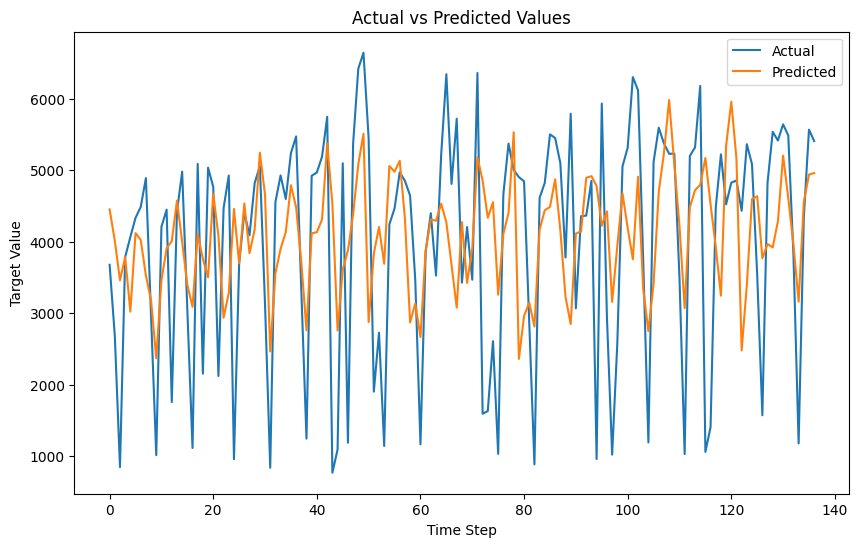

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions with the trained LSTM model
y_pred = model.predict(X_train)

# Plot the actual values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Target Value')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions with the trained LSTM model
y_pred_lstm = model.predict(X_train)

# Calculate evaluation metrics for LSTM model
mse_lstm = mean_squared_error(y_train, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_train, y_pred_lstm)
r2_lstm = r2_score(y_train, y_pred_lstm)

# Print evaluation metrics for LSTM model
print("LSTM Model Evaluation Metrics:")
print("MSE: ", mse_lstm)
print("RMSE: ", rmse_lstm)
print("MAE: ", mae_lstm)


5/5 [==============================] - 0s 4ms/step
LSTM Model Evaluation Metrics:
MSE:  2194614.4276771294
RMSE:  1481.4231089317898
MAE:  1187.1256807424727


In [ ]:
mse_arima
mse_sarima
mse_lstm

2194614.4276771294

In [ ]:
mse_arima

2751802.1229453785

In [ ]:
df_score=pd.DataFrame()

In [ ]:
df_score

""


In [ ]:
pd.DataFrame({'MseLstm':[mse_lstm,]})

,MseLstm
0,2.194614e+06


In [ ]:
pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA','LSTM'],
    'MSE': [mse_arima, mse_sarima, mse_lstm],
    'RMSE': [rmse_arima, rmse_sarima, rmse_lstm],
    'MAE': [mae_arima, mae_sarima, mae_lstm]
})

,Model,MSE,RMSE,MAE
0,ARIMA,2.751802e+06,1658.855667,1305.977768
1,SARIMA,2.751802e+06,1658.855667,1305.977768
2,LSTM,2.194614e+06,1481.423109,1187.125681
